In [41]:
from dm_control import viewer
from dm_control import mjcf
from dm_control.mujoco.wrapper.mjbindings import mjlib
import sys
sys.path.append('/home/diego/code/olveczky/dm/stac/')
import rodent_environments
import util
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [42]:
# Kp_data is just a placeholder, consider refactoring
model_path = '/home/diego/code/olveczky/dm/stac/models/rat_june26.xml'
param_path = '/home/diego/code/olveczky/dm/stac/params/june26/JDM25.yaml'
kp_data = np.zeros((100, 60))
params = util.load_params(param_path)
params['_XML_PATH'] = model_path
params['n_frames'] = kp_data.shape[0]
env = rodent_environments.rodent_mocap(kp_data, params)


mass = mjlib.mj_getTotalmass(env.physics.model.ptr)
print("Total mass is: %f kilograms" % (mass))

Total mass is: 0.324996 kilograms


In [43]:
mass = [0, 0.078, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042, 0.0042, 0.089, 0.012, 0.0071, 0.0012, 0.001, 0.012, 0.0071, 0.0012, 0.001, 0.0031, 0.0019, 0.0018, 0.0012, 0.00048, 0.00038, 0.00027, 0.0002, 0.00024, 0.00033, 0.00013, 0.00013, 9.1e-05, 6.8e-05, 7.2e-05, 7.9e-05, 6.2e-05, 6.5e-05, 6.8e-05, 5.7e-05, 5.8e-05, 4.3e-05, 4.5e-05, 4.6e-05, 4.8e-05, 5e-05, 5.1e-05, 4.7e-05, 4.8e-05, 5e-05, 0.00092, 0.00074, 0.0006, 0.00047, 0.00036, 0.00027, 0.0002, 0.028, 0.01, 0.0075, 0.0079, 0.0027, 0.00022, 0.00028, 0.0075, 0.0079, 0.0027, 0.00022, 0.00028]



name = ["world", "torso", "vertebra_1", "vertebra_2", "vertebra_3", "vertebra_4", "vertebra_5", "vertebra_6", "pelvis", "upper_leg_L", "lower_leg_L", "foot_L", "toe_L", "upper_leg_R", "lower_leg_R", "foot_R", "toe_R", "vertebra_C1", "vertebra_C2", "vertebra_C3", "vertebra_C4", "vertebra_C5", "vertebra_C6", "vertebra_C7", "vertebra_C8", "vertebra_C9", "vertebra_C10", "vertebra_C11", "vertebra_C12", "vertebra_C13", "vertebra_C14", "vertebra_C15", "vertebra_C16", "vertebra_C17", "vertebra_C18", "vertebra_C19", "vertebra_C20", "vertebra_C21", "vertebra_C22", "vertebra_C23", "vertebra_C24", "vertebra_C25", "vertebra_C26", "vertebra_C27", "vertebra_C28", "vertebra_C29", "vertebra_C30", "vertebra_cervical_5", "vertebra_cervical_4", "vertebra_cervical_3", "vertebra_cervical_2", "vertebra_cervical_1", "vertebra_axis", "vertebra_atlant", "skull", "jaw", "scapula_L", "upper_arm_L", "lower_arm_L", "hand_L", "finger_L", "scapula_R", "upper_arm_R", "lower_arm_R", "hand_R", "finger_R"]

subtreemass = [0.32, 0.32, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.14, 0.021, 0.0093, 0.0022, 0.001, 0.021, 0.0093, 0.0022, 0.001, 0.011, 0.0081, 0.0062, 0.0044, 0.0032, 0.0027, 0.0024, 0.0021, 0.0019, 0.0016, 0.0013, 0.0012, 0.001, 0.00096, 0.00089, 0.00082, 0.00074, 0.00068, 0.00061, 0.00054, 0.00049, 0.00043, 0.00039, 0.00034, 0.00029, 0.00025, 0.0002, 0.00015, 9.8e-05, 5e-05, 0.042, 0.041, 0.04, 0.039, 0.039, 0.038, 0.038, 0.038, 0.01, 0.019, 0.011, 0.0032, 0.0005, 0.00028, 0.019, 0.011, 0.0032, 0.0005, 0.00028]

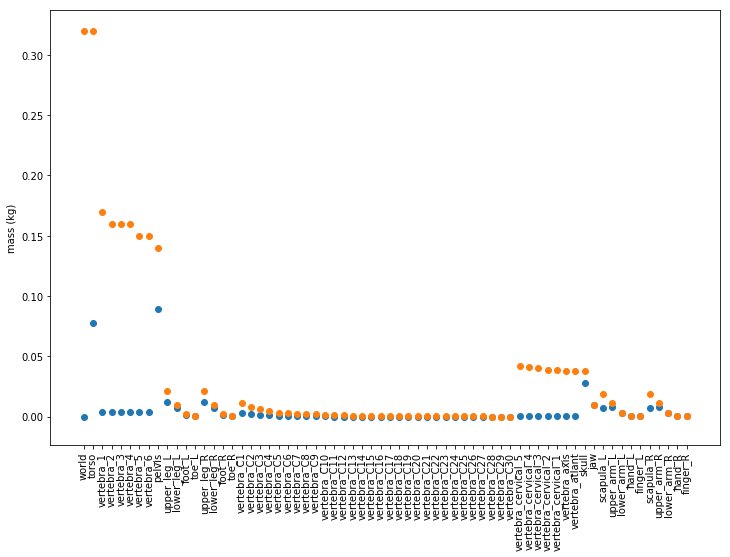

In [70]:
fig, ax = plt.subplots(figsize=(12,8))
x = range(len(name))
plt.scatter(x, mass)
plt.scatter(x, subtreemass)
plt.xticks(x)
_ = ax.set_xticklabels(name, rotation=90)

plt.ylabel('mass (kg)')
plt.rcParams['font.size'] = 10

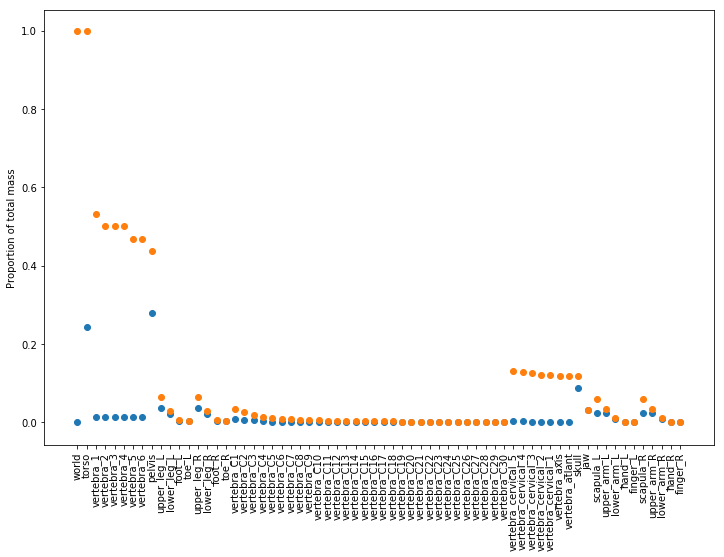

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
x = range(len(name))

plt.scatter(x, [m/subtreemass[0] for m in mass])
plt.scatter(x, [m/subtreemass[0] for m in subtreemass])

plt.xticks(x)
_ = ax.set_xticklabels(name, rotation=90)

plt.ylabel('Proportion of total mass')
plt.rcParams['font.size'] = 10